<a href="https://colab.research.google.com/github/AbhishekRP2002/AbhisX12/blob/main/GPU_Benchmarking_with_Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np 

In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.test.is_built_with_cuda()

True

In [ ]:
(X_train, y_train),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [ ]:
X_train.shape  #3 is for three dimensions RGB 

(50000, 32, 32, 3)

In [ ]:
y_train[1]

array([9], dtype=uint8)

In [ ]:
def plot_sample(index):    ##function defined to show an img using matplot lib
  plt.figure(figsize = (10,1))
  plt.imshow(X_train[index]) #imshow is the function  that will show u the image 

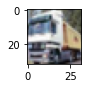

In [ ]:
plot_sample(1)

Scaling improves the model performance . Here we have to divide our training set values by 255. By dividing we are normalising the value of the training data , we are helping our deep learning model to train better 

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
X_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype ='float32'
)
y_train_categorical[:5]  #This is called One Hot Encoding 

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype ='float32'
)

**Model Building**

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape= (32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid'),

])

model.compile (optimizer='SGD',
loss='categorical_crossentropy',  #When you have disrete values in y training use sparse_categorical_crossentropy
metrics=['accuracy']) #and when u have one hot encoding use categorical_crossentropy


model.fit(X_train_scaled, y_train_categorical , epochs =50)

Epoch 1/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8117 - accuracy: 0.3543
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6233 - accuracy: 0.4261
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5414 - accuracy: 0.4554
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4830 - accuracy: 0.4781
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4342 - accuracy: 0.4945
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3913 - accuracy: 0.5104
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3521 - accuracy: 0.5252
Epoch 8/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3174 - accuracy: 0.5365
Epoch 9/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2849 - accuracy: 0.5498
Epoch 10/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.254

In [ ]:
model.evaluate(X_test_scaled, y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 1.5948 - accuracy: 0.5601


[1.5948418378829956, 0.5601000189781189]

In [ ]:
np.argmax(model.predict(X_test_scaled)[1])

8

In [ ]:
def get_model():
   model = keras.Sequential([
           keras.layers.Flatten(input_shape= (32,32,3)),
           keras.layers.Dense(3000,activation='relu'),
           keras.layers.Dense(1000,activation='relu'),
           keras.layers.Dense(10,activation='sigmoid')

          ])

   model.compile(
        optimizer='SGD',
                  loss='categorical_crossentropy',  
                  metrics=['accuracy'])

   return model

In [ ]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
  cpu_model = get_model()
  cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 79s 50ms/step - loss: 1.8135 - accuracy: 0.3519
1 loop, best of 1: 1min 19s per loop


In [ ]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
  cpu_model = get_model()
  cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 6s 4ms/step - loss: 1.8171 - accuracy: 0.3505
1 loop, best of 1: 11.7 s per loop
